# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
total = len(cities)
print(f"We have found a total of {total} cities.")

We have found a total of 614 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create empty lists for location info & weather variables
found_cities = []
country = []
lat = []
lng = []
max_temp = []
humid = []
clouds = []
wind_speed = []
date = []

In [4]:
# loop through cities list to build out json response and print log
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

print("Beginning Data Retrieval     ")
print("-----------------------------")

for index, city in enumerate(cities):
    try:
        query = f"{url}{city}"
        response = requests.get(query)
        result = response.json()
        
    # append city & weather variable data to lists
        country.append(result["sys"]["country"])
        lat.append(result["coord"]["lat"])
        lng.append(result["coord"]["lon"])
        max_temp.append(result["main"]["temp_max"])
        humid.append(result["main"]["humidity"])
        clouds.append(result["clouds"]["all"])
        wind_speed.append(result["wind"]["speed"])
        date.append(result["dt"])
        
    # increase index
        index += 1
        print(f"Processing Record #{index} | {city}")
        
        found_cities.append(city)
        
    except:
        index += 1
        print(f"Record #{index} not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record #1 | rikitea
Processing Record #2 | qaanaaq
Processing Record #3 | anadyr
Record #4 not found. Skipping...
Processing Record #5 | yellowknife
Processing Record #6 | hasaki
Processing Record #7 | punta arenas
Record #8 not found. Skipping...
Processing Record #9 | bredasdorp
Processing Record #10 | hithadhoo
Record #11 not found. Skipping...
Processing Record #12 | luderitz
Processing Record #13 | xichang
Processing Record #14 | portland
Processing Record #15 | albany
Processing Record #16 | mount isa
Processing Record #17 | atuona
Processing Record #18 | barrow
Processing Record #19 | edea
Processing Record #20 | burnie
Processing Record #21 | nikolskoye
Processing Record #22 | ambilobe
Processing Record #23 | busselton
Record #24 not found. Skipping...
Processing Record #25 | bilibino
Processing Record #26 | hilo
Processing Record #27 | hermanus
Processing Record #28 | montevideo
Processing Record #29 | acap

Processing Record #240 | faanui
Processing Record #241 | kutum
Processing Record #242 | louisville
Processing Record #243 | gejiu
Processing Record #244 | qaqortoq
Processing Record #245 | cabo san lucas
Record #246 not found. Skipping...
Processing Record #247 | pokhara
Processing Record #248 | sept-iles
Processing Record #249 | severo-kurilsk
Processing Record #250 | valverde del camino
Processing Record #251 | concepcion del oro
Processing Record #252 | tarauaca
Processing Record #253 | san policarpo
Processing Record #254 | merrill
Processing Record #255 | san quintin
Processing Record #256 | taunggyi
Processing Record #257 | ponta do sol
Processing Record #258 | new norfolk
Processing Record #259 | cockburn town
Processing Record #260 | mizdah
Processing Record #261 | ancud
Processing Record #262 | katsuura
Processing Record #263 | baykit
Processing Record #264 | port lincoln
Processing Record #265 | santiago del estero
Processing Record #266 | hualmay
Processing Record #267 | sai

Processing Record #477 | chalons-en-champagne
Processing Record #478 | rawah
Processing Record #479 | santa maria
Processing Record #480 | pochutla
Processing Record #481 | abu samrah
Processing Record #482 | tulsipur
Processing Record #483 | sao jose da coroa grande
Processing Record #484 | benguela
Processing Record #485 | bria
Processing Record #486 | mathbaria
Processing Record #487 | santa rosa
Processing Record #488 | corinto
Processing Record #489 | amga
Processing Record #490 | sur
Processing Record #491 | russkaya polyana
Processing Record #492 | bandarbeyla
Processing Record #493 | karwar
Record #494 not found. Skipping...
Processing Record #495 | ust-tsilma
Processing Record #496 | metro
Processing Record #497 | adrar
Processing Record #498 | yar-sale
Processing Record #499 | antofagasta
Processing Record #500 | port hawkesbury
Processing Record #501 | ovalle
Processing Record #502 | riyadh
Processing Record #503 | sitka
Processing Record #504 | pacific grove
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dataframe
weather_df = pd.DataFrame({
    "City": found_cities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp (F)": max_temp,
    "Humidity (%)": humid,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind_speed,
    "Date": date
})

weather_df

,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,rikitea,PF,-23.1203,-134.9692,79.32,71,17,11.88,1613528677
1,qaanaaq,GL,77.4840,-69.3632,-6.79,86,94,6.24,1613528677
2,anadyr,RU,64.7500,177.4833,-13.36,86,0,6.53,1613528677
3,yellowknife,CA,62.4560,-114.3525,-18.00,76,75,5.75,1613528678
4,hasaki,JP,35.7333,140.8333,54.00,37,40,18.41,1613528678
...,...,...,...,...,...,...,...,...,...
560,luena,AO,-11.7833,19.9167,64.15,78,100,3.06,1613528744
561,qasigiannguit,GL,68.8193,-51.1922,3.20,60,90,8.05,1613528744
562,plainview,US,40.7765,-73.4673,33.21,88,0,15.64,1613528744
563,odweyne,SO,9.4092,45.0640,58.82,76,57,5.01,1613528744


In [6]:
# export to csv
csv_path = "../output_data/weather.csv"
weather_csv = weather_df.to_csv(csv_path, index=False)

In [7]:
weather_df.count()

City                565
Country             565
Latitude            565
Longitude           565
Max Temp (F)        565
Humidity (%)        565
Cloudiness (%)      565
Wind Speed (mph)    565
Date                565
dtype: int64

In [8]:
weather_df.describe()

,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,16.938126,17.754130,49.355204,73.736283,50.844248,7.924496,1.613529e+09
std,33.980131,91.242785,33.164879,18.806296,41.197378,5.552385,7.168202e+01
min,-54.800000,-175.200000,-33.230000,15.000000,0.000000,0.160000,1.613528e+09
25%,-13.200000,-66.382100,28.400000,64.000000,1.000000,3.530000,1.613529e+09
50%,18.216400,21.548200,62.040000,78.000000,55.000000,6.510000,1.613529e+09
75%,45.783300,102.263400,75.580000,87.000000,97.000000,11.160000,1.613529e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,28.770000,1.613529e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_df = weather_df.loc[weather_df["Humidity (%)"] > 100].index
humid_df

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df = weather_df.drop(humid_df, inplace=False)

city_path = "../output_data/cities.csv"
cities_csv = city_df.to_csv(city_path, index=False)

# wasn't actually necessary, humidity cannot exceed 100% - that is called rain.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

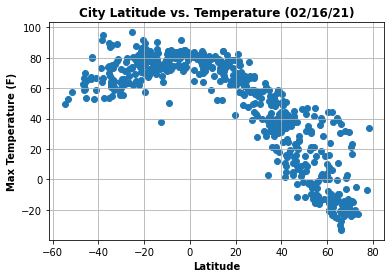

In [11]:
plt.scatter(city_df["Latitude"], city_df["Max Temp (F)"])
plt.ylabel("Max Temperature (F)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"), fontweight="bold")
plt.grid(True)
plt.savefig("../output_data/lat_vs_temp.png")
plt.show()

# strftime documentation: https://www.programiz.com/python-programming/datetime/strftime

## Latitude vs. Humidity Plot

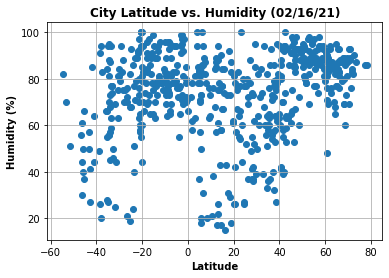

In [12]:
plt.scatter(city_df["Latitude"], city_df["Humidity (%)"])
plt.ylabel("Humidity (%)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"), fontweight="bold")
plt.grid(True)
plt.savefig("../output_data/lat_vs_humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

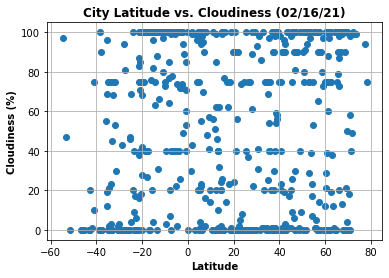

In [13]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness (%)"])
plt.ylabel("Cloudiness (%)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"), fontweight="bold")
plt.grid(True)
plt.savefig("../output_data/lat_vs_clouds.png")
plt.show()


## Latitude vs. Wind Speed Plot

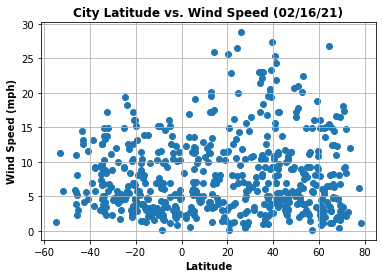

In [14]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed (mph)"])
plt.ylabel("Wind Speed (mph)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontweight="bold")
plt.grid(True)
plt.savefig("../output_data/lat_vs_wind.png")
plt.show()


## Linear Regression

In [15]:
# create northern & southern city dataframes

north_df = city_df.loc[weather_df["Latitude"] > 0]
south_df = city_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between the Northern Hemisphere Max Temp vs. Latitude is r = -0.89


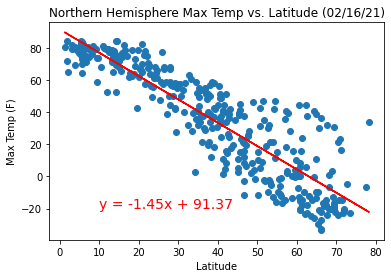

In [16]:
# linear reg calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"], north_df["Max Temp (F)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * north_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Northern Hemisphere Max Temp vs. Latitude is r = {rvalue}")

# plot, label, and annotate
# plt.figure(figsize = (10,8))
plt.scatter(north_df["Latitude"], north_df["Max Temp (F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere Max Temp vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(north_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (10,-20), fontsize=14, color="red")
plt.savefig("../output_data/north_hem_vs_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between the Southern Hemisphere Max Temp vs. Latitude is r = 0.46


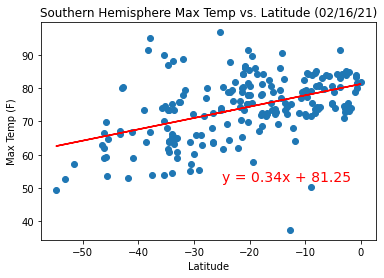

In [19]:
# linear regr calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"], south_df["Max Temp (F)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * south_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Southern Hemisphere Max Temp vs. Latitude is r = {rvalue}")

# plot, label, and annotate
plt.scatter(south_df["Latitude"], south_df["Max Temp (F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere Max Temp vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(south_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (-25,52), fontsize=14, color="red")
plt.savefig("../output_data/south_hem_vs_maxtemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between the Northern Hemisphere Humidity (%) vs. Latitude is r = 0.39


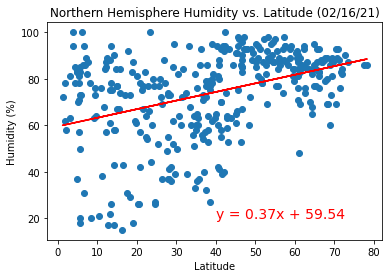

In [20]:
# linear reg calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"], north_df["Humidity (%)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * north_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Northern Hemisphere Humidity (%) vs. Latitude is r = {rvalue}")

# plot, label, and annotate
# plt.figure(figsize = (10,8))
plt.scatter(north_df["Latitude"], north_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(north_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize=14, color="red")
plt.savefig("../output_data/north_hem_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between the Southern Hemisphere Humidity (%) vs. Latitude is r = 0.44


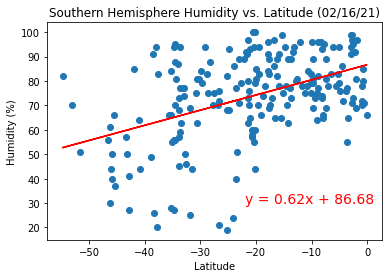

In [21]:
# linear regr calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"], south_df["Humidity (%)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * south_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Southern Hemisphere Humidity (%) vs. Latitude is r = {rvalue}")

# plot, label, and annotate
plt.scatter(south_df["Latitude"], south_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(south_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (-22,30), fontsize=14, color="red")
plt.savefig("../output_data/south_hem_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between the Northern Hemisphere Cloudiness (%) vs. Latitude is r = 0.14


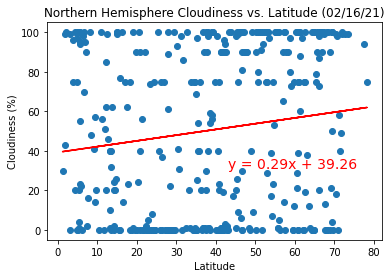

In [23]:
# linear reg calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"], north_df["Cloudiness (%)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * north_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Northern Hemisphere Cloudiness (%) vs. Latitude is r = {rvalue}")

# plot, label, and annotate
# plt.figure(figsize = (10,8))
plt.scatter(north_df["Latitude"], north_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(north_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (43,31), fontsize=14, color="red")
plt.savefig("../output_data/north_hem_vs_clouds.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between the Southern Hemisphere Cloudiness (%) vs. Latitude is r = 0.51


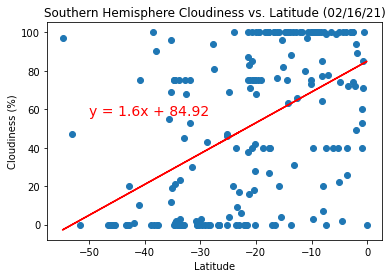

In [25]:
# linear regr calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"], south_df["Cloudiness (%)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * south_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Southern Hemisphere Cloudiness (%) vs. Latitude is r = {rvalue}")

# plot, label, and annotate
plt.scatter(south_df["Latitude"], south_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(south_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (-50,57), fontsize=14, color="red")
plt.savefig("../output_data/south_hem_vs_clouds.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between the Northern Hemisphere Wind Speed (mph) vs. Latitude is r = -0.06


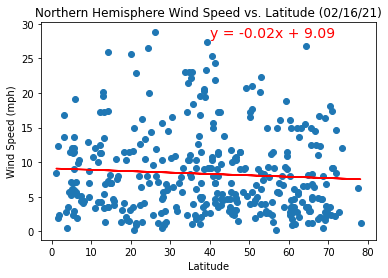

In [29]:
# linear reg calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"], north_df["Wind Speed (mph)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * north_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Northern Hemisphere Wind Speed (mph) vs. Latitude is r = {rvalue}")

# plot, label, and annotate
# plt.figure(figsize = (10,8))
plt.scatter(north_df["Latitude"], north_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(north_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (40,28), fontsize=14, color="red")
plt.savefig("../output_data/north_hem_vs_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between the Southern Hemisphere Wind Speed (mph) vs. Latitude is r = -0.12


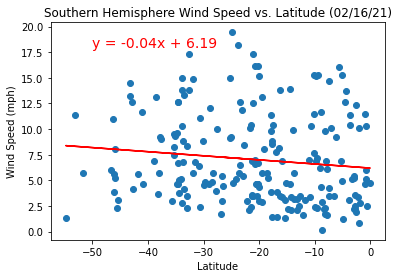

In [32]:
# linear regr calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"], south_df["Wind Speed (mph)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (slope * south_df["Latitude"]) + intercept
line_eq = f"y = {slope}x + {intercept}"

# print r value statement
print(f"The correlation coefficient between the Southern Hemisphere Wind Speed (mph) vs. Latitude is r = {rvalue}")

# plot, label, and annotate
plt.scatter(south_df["Latitude"], south_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

plt.plot(south_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (-50,18), fontsize=14, color="red")
plt.savefig("../output_data/south_hem_vs_wind.png")
plt.show()